# Invent Car Parking

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

In [5]:
# read in data
df = pd.read_csv("D:\Data Analysis\Practicum\DCU car parking data\Final_Data\invent_parking_data_final.csv",header='infer',index_col=0)

In [6]:
df.head()

,Date,Hour,Month,Day,Holiday,Weekday,WorkingDay,Total Parking Spaces,No of parking spaces left,Free Spaces %,Occupancy
Instant,,,,,,,,,,,
1,1-Feb-17,0,2,Wednesday,0,3,1,107,106,99,1
2,1-Feb-17,1,2,Wednesday,0,3,1,107,106,99,1
3,1-Feb-17,2,2,Wednesday,0,3,1,107,106,99,1
4,1-Feb-17,3,2,Wednesday,0,3,1,107,106,99,1
5,1-Feb-17,4,2,Wednesday,0,3,1,107,106,99,1


In [7]:
df.tail()

,Date,Hour,Month,Day,Holiday,Weekday,WorkingDay,Total Parking Spaces,No of parking spaces left,Free Spaces %,Occupancy
Instant,,,,,,,,,,,
2826,29-May-17,19,5,Monday,0,1,1,107,45,42,58
2827,29-May-17,20,5,Monday,0,1,1,107,50,47,53
2828,29-May-17,21,5,Monday,0,1,1,107,90,84,16
2829,29-May-17,22,5,Monday,0,1,1,107,107,100,0
2830,29-May-17,23,5,Monday,0,1,1,107,107,100,0


## Exploratory Data Analysis
### The Target Variable:  Occupancy(% of Free Car Parking Space)

Lets first look at the target variable.

In [8]:
df['Occupancy'].describe()

count    2830.000000
mean       37.925795
std        38.952548
min         0.000000
25%         2.000000
50%        25.000000
75%        81.000000
max       100.000000
Name: Occupancy, dtype: float64

In [9]:
np.median(df.Occupancy)

25.0

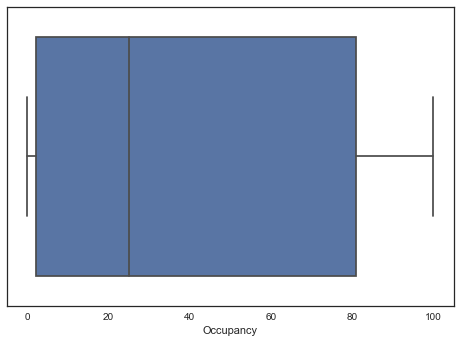

In [10]:
sns.boxplot(df.Occupancy)

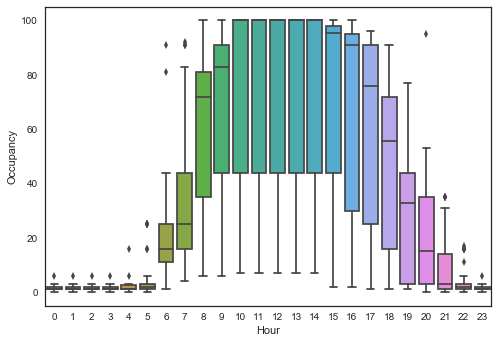

In [11]:
sns.boxplot(x=df.Hour, y=df.Occupancy)
plt.show()

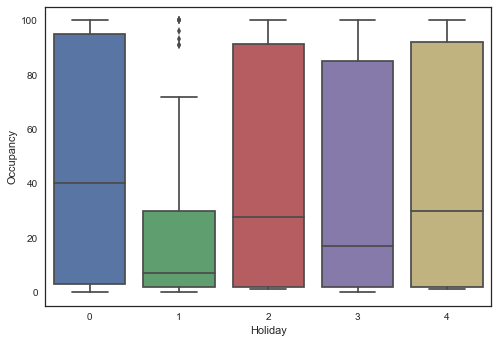

In [12]:
sns.boxplot(x=df.Holiday, y=df.Occupancy)
plt.show()

## Modifying DataSet for Co-rrelation Matrix
-Remove Unneeded Features

-One-hot Encoding of Nominal Features We use Pandas method .get_dummies to create dummy features of the nominal variables. First, we need to check if the categorial data are indeed of dtype category.



In [13]:
# make a copy of original dataframe
df_orig = df.copy()
df

,Date,Hour,Month,Day,Holiday,Weekday,WorkingDay,Total Parking Spaces,No of parking spaces left,Free Spaces %,Occupancy
Instant,,,,,,,,,,,
1,1-Feb-17,0,2,Wednesday,0,3,1,107,106,99,1
2,1-Feb-17,1,2,Wednesday,0,3,1,107,106,99,1
3,1-Feb-17,2,2,Wednesday,0,3,1,107,106,99,1
4,1-Feb-17,3,2,Wednesday,0,3,1,107,106,99,1
5,1-Feb-17,4,2,Wednesday,0,3,1,107,106,99,1
6,1-Feb-17,5,2,Wednesday,0,3,1,107,106,99,1
7,1-Feb-17,6,2,Wednesday,0,3,1,107,90,84,16
8,1-Feb-17,7,2,Wednesday,0,3,1,107,80,75,25
9,1-Feb-17,8,2,Wednesday,0,3,1,107,10,9,91


In [14]:
df = df.drop(['Date','Month','Day','Weekday','WorkingDay','Total Parking Spaces','No of parking spaces left','Free Spaces  %'],axis=1)

# check dtype of data


In [15]:
for x in df.columns:
    print df[x].dtype

int64
int64
int64


In [16]:
# transform categorial columns to categories
for x in ['Holiday']:
    df[x] = df[x].astype('category')

In [17]:
# check if transformation succeeded
for x in df.columns:
    print df[x].dtype

int64
category
int64


In [18]:
# make another copy
df_with_categories = df.copy()

In [19]:
# transform categorial variables into dummy variables
df = pd.get_dummies(df)

In [20]:
df.head()

,Hour,Occupancy,Holiday_0,Holiday_1,Holiday_2,Holiday_3,Holiday_4
Instant,,,,,,,
1,0,1,1,0,0,0,0
2,1,1,1,0,0,0,0
3,2,1,1,0,0,0,0
4,3,1,1,0,0,0,0
5,4,1,1,0,0,0,0


In [101]:
df.to_csv("D:\Data Analysis\Practicum\DCU car parking data\Final_Data\invent_parking_data_New_columns.csv")

### Check for Correlation in Numerical Features

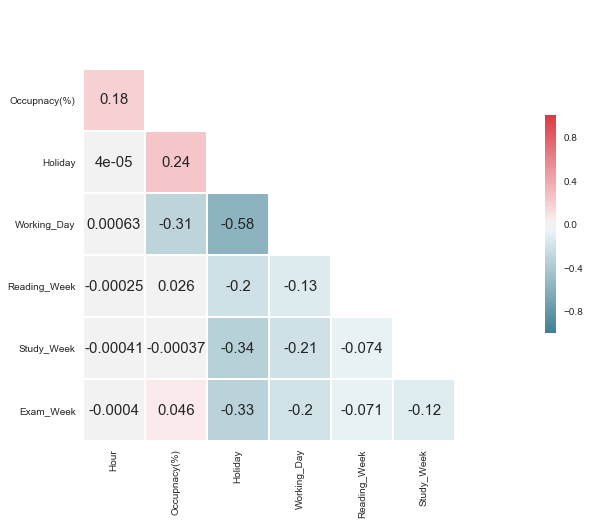

In [15]:
df=pd.read_csv("D:\Data Analysis\Practicum\DCU car parking data\Final_Data\invent_parking_data_correlation_occcupancy.csv")

feature_namesx= ['Hour','Occupnacy(%)','Holiday','Working_Day','Reading_Week','Study_Week']

feature_namesy= ['Occupnacy(%)','Holiday','Working_Day','Reading_Week','Study_Week','Exam_Week']

corrmat = df.corr()
corrmat
# Generate a mask for the upper triangle
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
ax=sns.heatmap(corrmat, annot=True, annot_kws={'size':15}, xticklabels=feature_namesx, yticklabels=feature_namesy,fmt=".2g",cmap=cmap,
           linewidths=1,cbar=True,mask=mask,center=0,square=True,ax=ax,cbar_kws={"shrink": .5})


plt.show()